# WeatherPy
----

### Analysis
* One of the trends identified by the API data for cities surrounding the equator are that peak temperatures rise as you approach the latitudinal coordinate of 0 (the equator). As you move further away in either direction, you see the temperatures start to decrease in a bell-curve like shape. 
* Another trend that was easy to identify was the percent humidity. While there are a lot of locations with very high humidity, you can notice an increase in density between 80 and 100% humidity near the 0 degree latitudinal coordinate. You also notice there are a few areas with lower humidity percentages between the positive and negative 20 to 40 degrees latitude. However, the data seems skewed to the northern hemisphere. Distinctly though, there is a lack of cities with low humidity between -20 and 0 degrees latitude. 
* Cloud coverage doesn’t show a significant trend, but there are two density areas identified in the plot chart. Between -20 and 20 degrees there is a grouping of the cities below 50% cloud coverage. Inversely, there is a grouping between 40 and 80 degrees that shows cloud coverage above 70 percent. This would indicate that a significant portion of the cities surrounding the equator are trending towards lower cloud coverage indicating more sunlight thus hotter temperatures. Those further from the equator have more cloud coverage and this would indicate more shading from the sun resulting in cooler temperatures. 
* Lastly, windspeed starts to dip as you approach the equator as well, but it does not seem to be a major indicator on this particular date.  
---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
# Import API key
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

7163a20fbaccdbab1b17f386db7d51f6


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(city)


maningrida


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Creating URL Structure. Using an individual test to ensure url is right before the big pull
base_url = "http://api.openweathermap.org/data/2.5/weather?"
test_key = "7163a20fbaccdbab1b17f386db7d51f6"
testunits = 'imperial'
testcity = "scottsdale"
test_url = f"{base_url}appid={api_key}&units={testunits}&q={testcity}"

test_response = requests.get(test_url).json()
pprint(test_response)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 33.51, 'lon': -111.9},
 'dt': 1554569008,
 'id': 5313457,
 'main': {'humidity': 45,
          'pressure': 1016,
          'temp': 68.81,
          'temp_max': 73,
          'temp_min': 64.4},
 'name': 'Scottsdale',
 'sys': {'country': 'US',
         'id': 5795,
         'message': 0.0105,
         'sunrise': 1554556116,
         'sunset': 1554601863,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 233.504, 'speed': 3.94}}


In [4]:
# Final URL Base and setting units to be easily interchangable
units = 'imperial'
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# creating lists for all variables needed from data pull
cloudiness = []
latitude = []
longitude = []
humidity = []
hightemp = []
citylist = [] 
countrylist = []
windspeed = []


# Record and set starting points
recordcount = 1
setcount = 1

# setting up the structure for each line data collection

for city in cities:
#     building my interchangable url for each city response
    weather_url = f"{base_url}appid={api_key}&units={units}&q={city}"
    weather_response = requests.get(weather_url).json()
#     in order for the print to match I need to tell it what to label each record and set as
    if recordcount < 50:
        recordcount += 1
    else:
        setcount += 1
        recordcount = 0
#         printing record and set
    print(f'Processing Record {recordcount} of Set{setcount} | {city}')
    print(weather_url)
#     making sure to use a try and except for the cities it does not have an api response for
    try:
#         collect all of the information from the api responses
        cloudiness.append(weather_response['clouds']['all'])
        latitude.append(weather_response['coord']['lat'])
        longitude.append(weather_response['coord']['lon'])
        humidity.append(weather_response['main']['humidity'])
        hightemp.append(weather_response['main']['temp_max'])
        citylist.append(weather_response['name'])
        countrylist.append(weather_response['sys']['country'])
        windspeed.append(weather_response['wind']['speed'])
    except:
        print('*** City not found. Skipping to next city. ***')
        
    

    


Processing Record 2 of Set1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=thompson
Processing Record 3 of Set1 | tsihombe
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=tsihombe
*** City not found. Skipping to next city. ***
Processing Record 4 of Set1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=albany
Processing Record 5 of Set1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=vaini
Processing Record 6 of Set1 | upernavik
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=upernavik
Processing Record 7 of Set1 | cravo norte
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=cravo norte
Processing Record 8 of Set1 | puerto ayora
http:/

Processing Record 4 of Set2 | zelenets
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=zelenets
Processing Record 5 of Set2 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=illoqqortoormiut
*** City not found. Skipping to next city. ***
Processing Record 6 of Set2 | martapura
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=martapura
Processing Record 7 of Set2 | pachino
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=pachino
Processing Record 8 of Set2 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=pangnirtung
Processing Record 9 of Set2 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=hobart
Processing Record 10 of Set2 

Processing Record 7 of Set3 | praya
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=praya
Processing Record 8 of Set3 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=ribeira grande
Processing Record 9 of Set3 | kavieng
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=kavieng
Processing Record 10 of Set3 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=cidreira
Processing Record 11 of Set3 | tiksi
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=tiksi
Processing Record 12 of Set3 | airai
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=airai
Processing Record 13 of Set3 | sumbawa
http://api.openweathermap.org/data/2.5/weather?appid=7163a20

Processing Record 10 of Set4 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=sao miguel do araguaia
Processing Record 11 of Set4 | amderma
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=amderma
*** City not found. Skipping to next city. ***
Processing Record 12 of Set4 | lata
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=lata
Processing Record 13 of Set4 | humaita
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=humaita
Processing Record 14 of Set4 | chapais
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=chapais
Processing Record 15 of Set4 | ilinge
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=ilinge
Processing Record 16 of Set4 | 

Processing Record 12 of Set5 | talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=talcahuano
Processing Record 13 of Set5 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=lompoc
Processing Record 14 of Set5 | chum phae
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=chum phae
Processing Record 15 of Set5 | waipawa
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=waipawa
Processing Record 16 of Set5 | petrozavodsk
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=petrozavodsk
Processing Record 17 of Set5 | arrecife
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=arrecife
*** City not found. Skipping to next city. ***
Processing Record 18 of Set5 | lo

Processing Record 13 of Set6 | bonthe
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=bonthe
Processing Record 14 of Set6 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=ancud
Processing Record 15 of Set6 | salamiyah
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=salamiyah
Processing Record 16 of Set6 | atbasar
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=atbasar
Processing Record 17 of Set6 | palabuhanratu
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=palabuhanratu
*** City not found. Skipping to next city. ***
Processing Record 18 of Set6 | atar
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=atar
Processing Record 19 of Set6 | waghausel
http://a

Processing Record 13 of Set7 | inirida
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=inirida
Processing Record 14 of Set7 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=fairbanks
Processing Record 15 of Set7 | dutlwe
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=dutlwe
Processing Record 16 of Set7 | srandakan
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=srandakan
Processing Record 17 of Set7 | praia
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=praia
Processing Record 18 of Set7 | the pas
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=the pas
Processing Record 19 of Set7 | alice springs
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 14 of Set8 | huamachuco
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=huamachuco
Processing Record 15 of Set8 | mahina
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=mahina
Processing Record 16 of Set8 | hervey bay
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=hervey bay
Processing Record 17 of Set8 | vila velha
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=vila velha
Processing Record 18 of Set8 | mitchell
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=mitchell
Processing Record 19 of Set8 | port hedland
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=port hedland
Processing Record 20 of Set8 | domoni
http://api.openweathermap.org/data

Processing Record 15 of Set9 | prince rupert
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=prince rupert
Processing Record 16 of Set9 | adrar
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=adrar
Processing Record 17 of Set9 | grindavik
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=grindavik
Processing Record 18 of Set9 | shamary
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=shamary
Processing Record 19 of Set9 | springfield
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=springfield
Processing Record 20 of Set9 | baraut
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=baraut
Processing Record 21 of Set9 | petropavlovka
http://api.openweathermap.org/data/2.

Processing Record 17 of Set10 | chhapar
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=chhapar
Processing Record 18 of Set10 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=goderich
Processing Record 19 of Set10 | shchelyayur
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=shchelyayur
*** City not found. Skipping to next city. ***
Processing Record 20 of Set10 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=itarema
Processing Record 21 of Set10 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=dingle
Processing Record 22 of Set10 | imbituba
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=imbituba
Processing Record 23 of Set10 | cumar

Processing Record 19 of Set11 | kuching
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=kuching
Processing Record 20 of Set11 | providencia
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=providencia
Processing Record 21 of Set11 | galbshtadt
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=galbshtadt
Processing Record 22 of Set11 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=san cristobal
Processing Record 23 of Set11 | coahuayana
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=coahuayana
Processing Record 24 of Set11 | sioux lookout
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=sioux lookout
Processing Record 25 of Set11 | temaraia
http://ap

Processing Record 21 of Set12 | shpykiv
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=shpykiv
*** City not found. Skipping to next city. ***
Processing Record 22 of Set12 | coquimbo
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=coquimbo
Processing Record 23 of Set12 | omsukchan
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=omsukchan
Processing Record 24 of Set12 | kaeo
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=kaeo
Processing Record 25 of Set12 | najran
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=najran
Processing Record 26 of Set12 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?appid=7163a20fbaccdbab1b17f386db7d51f6&units=imperial&q=batagay-alyta
Processing Record 27 of Set12 | pingz

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# taking the long lists of information and putting the variables into a DF
df_weather = pd.DataFrame({
    "City" : citylist,
    "Country" : countrylist,
    "Latitude" : latitude,
    "Longitude" : longitude,
    "High Temperature" : hightemp,
    "Humidity" : humidity,
    "Cloud Coverage" : cloudiness,
    "Wind Speed" : windspeed})

df_weather500 = df_weather.sample(n = 500) 


df_weather500.head()


,City,Country,Latitude,Longitude,High Temperature,Humidity,Cloud Coverage,Wind Speed
286,Grand Gaube,MU,-20.01,57.66,80.60,74,75,11.41
419,Chhapar,IN,27.82,74.44,79.07,32,0,2.59
424,Ornskoldsvik,SE,63.29,18.72,37.40,69,92,4.70
183,Honiara,SB,-9.43,159.96,74.57,100,80,0.81
376,La Ronge,CA,55.10,-105.30,28.40,63,90,10.29


In [6]:
# export DF into a csv file
csv_export = df_weather500.to_csv(r'../CSVFolder/WeatherData.csv', index= None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
# temperature formula to adjust chart results based on Metric vs Imperial
if units == "imperial":
    degrees = "F"
elif units == "metric":
    degrees = "C"
else:
    degrees = "K"

In [8]:
# importing date for accurate titles
import datetime
d = datetime.datetime.today()
report_date = d.strftime('%m/%d/%y')

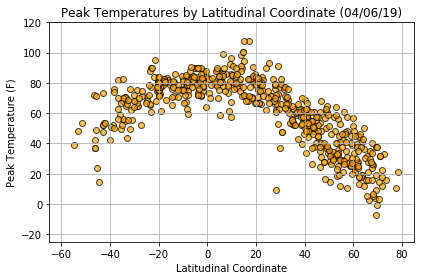

In [21]:
# Scatter plot structuring
plt.scatter(latitude, hightemp, marker = 'o', facecolors = 'orange', edgecolors= 'black', alpha=.7)
plt.title(f"Peak Temperatures by Latitudinal Coordinate ({report_date})")
plt.xlabel("Latitudinal Coordinate")
plt.ylabel(f"Peak Temperature ({degrees})")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-25,120)
plt.tight_layout()


plt.savefig('../Images/peak_temps.png')

#### Latitude vs. Humidity Plot

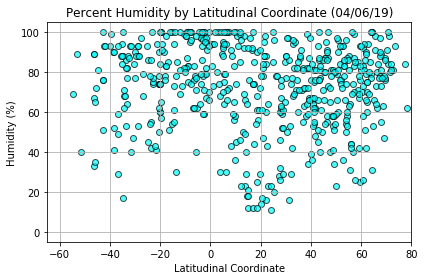

In [20]:
# Scatter plot structuring

plt.scatter(latitude, humidity, marker = 'o', facecolors = 'aqua', edgecolors= 'black', alpha=.7)
plt.title(f"Percent Humidity by Latitudinal Coordinate ({report_date})")
plt.xlabel("Latitudinal Coordinate")
plt.ylabel(f"Humidity (%)")
plt.grid()
plt.xlim(-65,80)
plt.ylim(-5,105)
plt.tight_layout()


plt.savefig('../Images/humidity.png')

#### Latitude vs. Cloudiness Plot

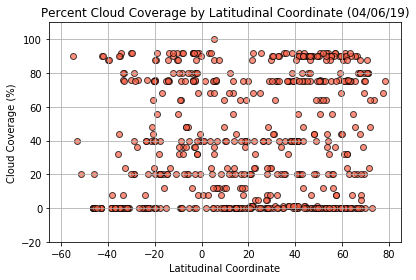

In [18]:
# Scatter plot structuring

plt.scatter(latitude, cloudiness, marker = 'o', facecolors = 'tomato', edgecolors= 'black', alpha=.7)
plt.title(f"Percent Cloud Coverage by Latitudinal Coordinate ({report_date})")
plt.xlabel("Latitudinal Coordinate")
plt.ylabel(f"Cloud Coverage (%)")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-20,110)
plt.tight_layout()


plt.savefig('../Images/cloudcover.png')

#### Latitude vs. Wind Speed Plot

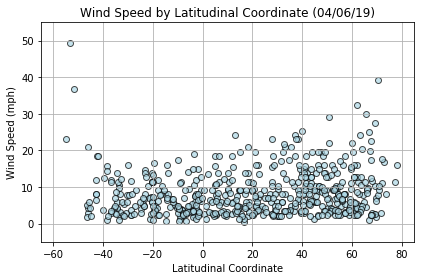

In [22]:
# Scatter plot structuring

plt.scatter(latitude, windspeed, marker = 'o', facecolors = 'lightblue', edgecolors= 'black', alpha=.7)
plt.title(f"Wind Speed by Latitudinal Coordinate ({report_date})")
plt.xlabel("Latitudinal Coordinate")
plt.ylabel(f"Wind Speed (mph)")
plt.grid()
plt.xlim(-65,85)
plt.ylim(-5,55)
plt.tight_layout()


plt.savefig('../Images/windspeed.png')